# CUSTOMER CHURN ANALYSIS:  PREDICTION & RETENTION

<b><u>Objective:</u></b> <i>The main objective of this study is to predict customers who are ore likely to churn in a near future of a telecom company "TELCO". In this study, I have explored a dataset published by IBM. The whole project is divided maily into 5 Parts,</i>

## 1. Understanding Dataset 
## 2. Exploring Data Analysis: Divided all the features into 5 categories and performed Univariate and Multivariate Analysis
### 2.1. Demographics
##### 2.1.1. Gender
##### 2.1.2. Senior Citizens
##### 2.1.3. Partners and Dependents
##### 2.1.4. Customers with Partners & Dependents
### 2.2. Customer Accounts
##### 2.2.1. Tenure
##### 2.2.2. Number of Customers by Contract type
### 2.3. Services used by Customers
### 2.4. Monthly charges by total charges
### 2.5. Multivariate Analysis by Target Feature (churn)
##### 2.5.1. Calculate churn rate
##### 2.5.2. Churn rate by Tenure
##### 2.5.3. Churn rate by Contract type
##### 2.5.4. Churn rate by seniority
##### 2.5.5. Churn rate by Monthly charges
##### 2.5.6. Churn rate by Total charges
## 3. Data Modeling
#### 3.1. Feature Engineering
#### 3.2. Logistic Regression
#### 3.3. Random Forests
#### 3.4. Extreme Gradient Boosting
## 4. Evaluation
#### 4.1. Classification Accuracy
#### 4.2. Confusion Matrix
#### 4.3. Area Under Curve
## 5. Observations: Retention policies







In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
dataset = pd.read_csv("/Users/poojatyagi/Desktop/churn analysis/WA_Fn-UseC_-Telco-Customer-Churn.csv")


# 1. Understanding Dataset 

<b>Determining the number of columns and number of instances</b> 




In [12]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
dataset.shape

(7043, 21)

## Checking if there is any null values

In [14]:
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Checking the data type of each column

In [15]:
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

<b>Converting the column "TotalCharges" datatype from OBJECT to NUMERIC type</b>

In [16]:
dataset.TotalCharges = pd.to_numeric(dataset.TotalCharges, errors= 'coerce')

In [17]:
dataset.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
#Handling missing values
dataset.dropna(inplace = True)

#Rechecking the null values after removing the missing values
dataset.isnull().sum()

#Remove customer IDs from the data set
dt_set = dataset.iloc[:,1:]

#Converting the target variable "CHURN" featue into binary numeric variable
dt_set['Churn'].replace(to_replace='Yes', value=1, inplace=True)
dt_set['Churn'].replace(to_replace='No',  value=0, inplace=True)

#converting all the categorical variables into dummy variables 
#There are 3 ways of handling categorical features:
  #1. Creating Dummy variables
  #2. Label Encoding
  #3. One - Hot Encoding 
    
dt_dummies = pd.get_dummies(dt_set)
print("Creating the dummies of categorical columns:")
dt_dummies.head()



Creating the dummies of categorical columns:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


## Total number of columns after creating the dummy variables are 

In [19]:
#Total number of columns after creating the dummy variables are 
print("Total number of columns of dummied datase are:", dt_dummies.shape[1])
dt_dummies.columns.values

Total number of columns of dummied datase are: 46


array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contr

## Getting Correlation of "Churn" with other features: 

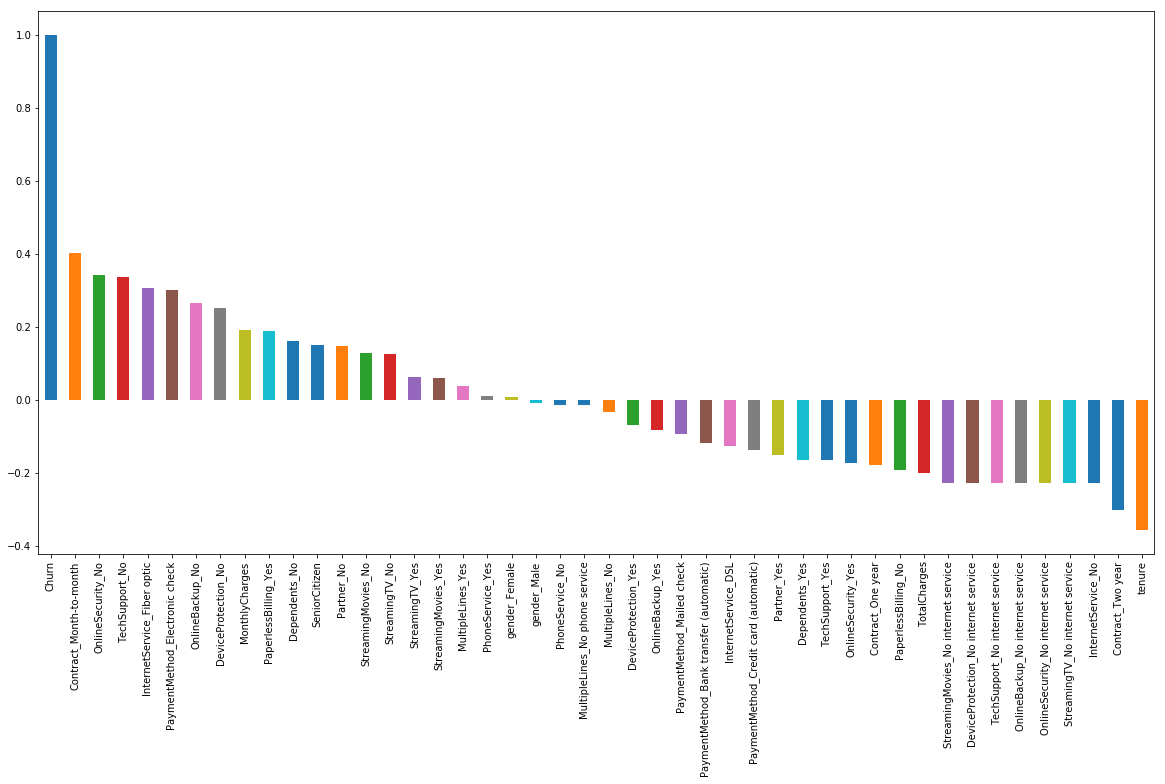

In [20]:
#Getting Correlation of "Churn" with other features:
plt.figure(figsize=(20,10))
dt_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

## Insights from above graph

1. Month to month contracts, absence of online security and tech support seem to be <b>positively correlated</b> with churn. While, tenure, two year contracts seem to be <b>negatively correlated</b> with churn.

2. Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be <b>negatively related</b> to churn.

3. We will explore the patterns for the above correlations below before we delve into modelling and identifying the important variables.

# 2. Exploratory Data Analysis

To better understand the patterns in the data and potentially form some hypothesis I have explored the dataset. First we will look at the distribution of individual variables and then slice and dice our data for any interesting trends.


## 2.1. DEMOGRAPHICS
Let us first understand the <b>gender</b>, <b>age range</b>, <b>patner</b> and <b>dependent status</b> of the customers

### 2.1.1 GENDER: 
The below graph shows that in this dataset there are approximately equal number of males <b>(50.5%)</b> and females <b>(49.5%)</b>

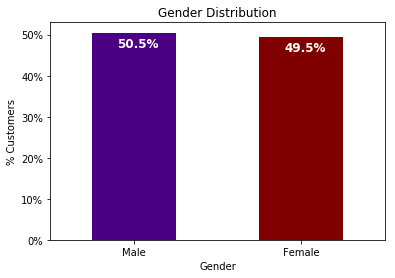

In [21]:
colors = ['#4B0082', '#800000']
ax = (dataset['gender'].value_counts()*100.0 /len(dataset)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

### 2.1.2. SENIOR CITIZEN:
The pie chart below shows the <b>% of senior citizens</b>. It shows there are more younger people in ths dataset and there are only <b>16.2%</b> of elder people.

Text(0.5,1,'% of Senior Citizens')

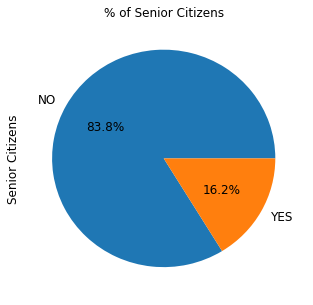

In [22]:
ax = (dataset['SeniorCitizen'].value_counts()*100.0 /len(dataset))\
.plot.pie(autopct='%.1f%%', labels = ['NO', 'YES'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

### 2.1.3. PARTNER AND DEPENDENT STATUS:
About <b>48%</b> of the customers have a <b>partner</b>, while only <b>30%</b> of the total customers have <b>dependents</b>.

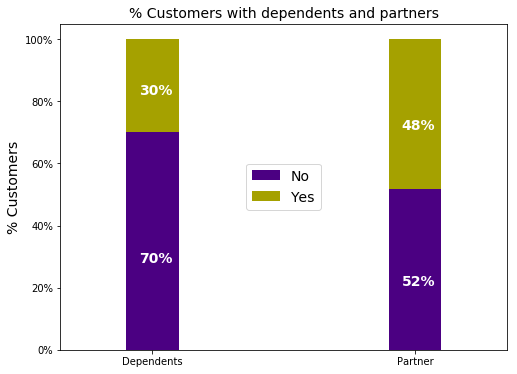

In [23]:
df2 = pd.melt(dataset, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(dataset)
colors = ['#4B0082', '#a5a100']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

## What would be interesting is to look at the % of customers, who have partners and also have dependents. 

## Let's explore this

### 2.1.4. CUSTOMERS WITH PARTNERS AND DEPENDENTS:
Interestingly, among the customers who have a partner, only about <b>50% of them also have a dependent</b>, while other half do not have any independents. Additionally, as expected, among the customers who do not have any partner, a majority i.e., 80% of them <b>do not have any dependents</b> .

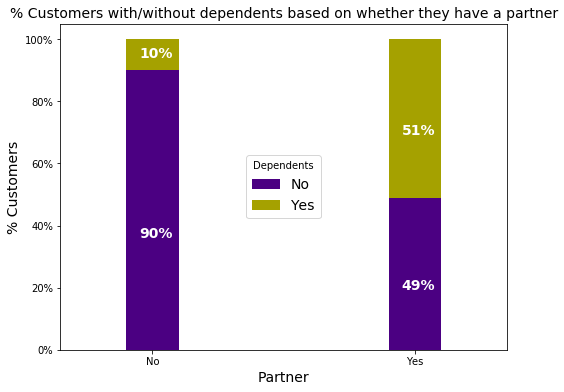

In [24]:
colors = ['#4B0082', '#a5a100']
partner_dependents = dataset.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

## 2.2. CUSTOMER ACCOUNTS

### 2.2.1. Tenure : 


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'# of Customers by their tenure')

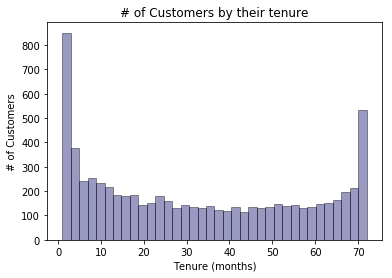

In [25]:
ax = sns.distplot(dataset['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = '#000066', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

### 2.2.2. Number of customers by contract type

Text(0.5,1,'No. of Customers by Contract Type')

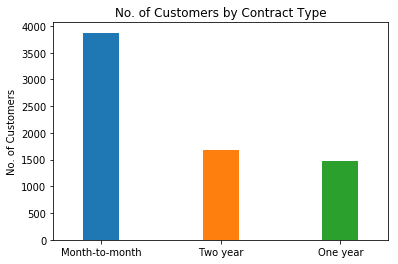

In [26]:
ax = dataset['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('No. of Customers')
ax.set_title('No. of Customers by Contract Type')


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Two Year Contract')

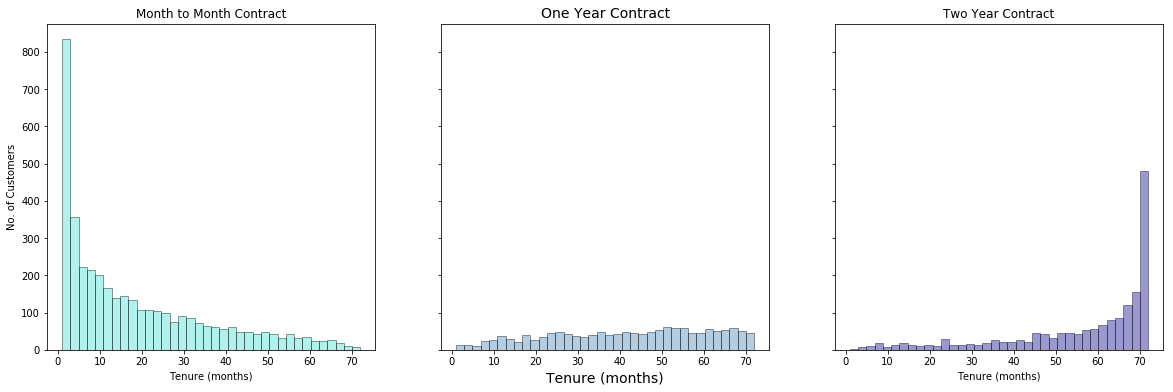

In [27]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(dataset[dataset['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')


ax = sns.distplot(dataset[dataset['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(dataset[dataset['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')


## 2.3. SERVICES USED BY CUSTOMER

In [28]:
dataset.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

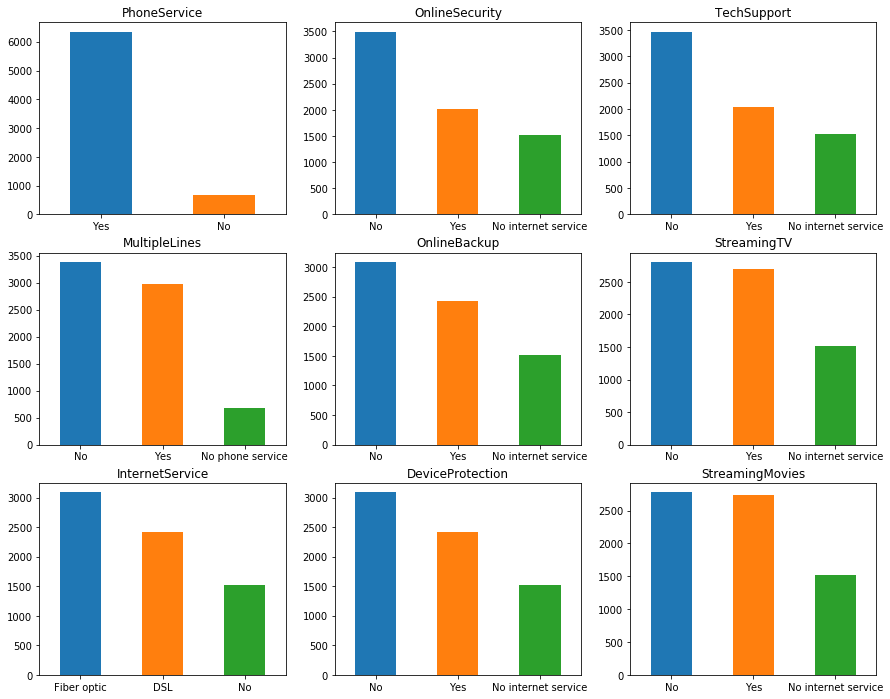

In [29]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, value in enumerate(services):
    if i < 3:
        ax = dataset[value].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = dataset[value].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = dataset[value].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(value)


## 2.4. Monthly Charges by Total Charges

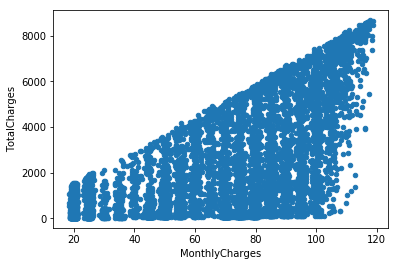

In [30]:
dataset[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

## 2.5. Multivariate analysis of features by target variable (CHURN)

### 2.5.1 Calculating Churn rate 

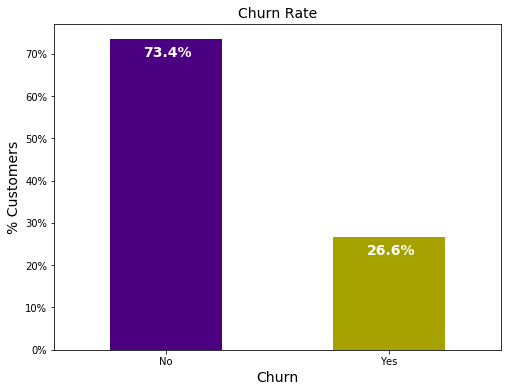

In [31]:
colors = ['#4B0082', '#a5a100']
ax = (dataset['Churn'].value_counts()*100.0 /len(dataset)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

### 2.5.2. CHURN RATE by TENURE

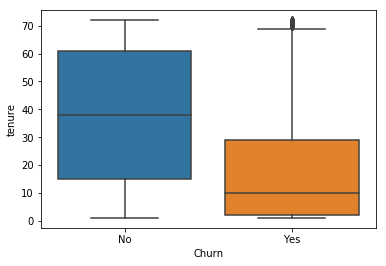

In [32]:
sns.boxplot(x = dataset.Churn, y = dataset.tenure)

### 2.5.3. CHURN RATE by CONTRACT TYPE

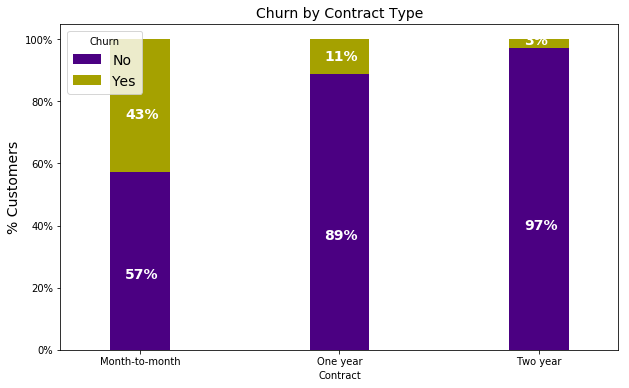

In [33]:
colors = ['#4B0082', '#a5a100']
contract_churn = dataset.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

### 2.5.4. CHURN by SENIORITY

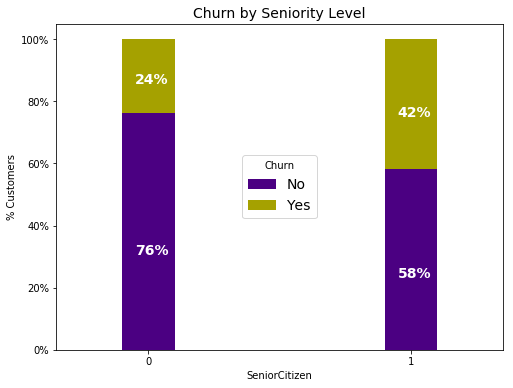

In [34]:
colors = ['#4B0082','#a5a100']
seniority_churn = dataset.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)


# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

### 2.5.5. CHURN by MONTHLY CHARGES

Text(0.5,1,'Distribution of monthly charges by churn')

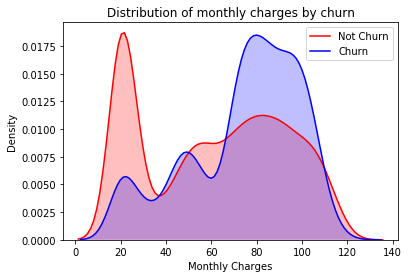

In [35]:
ax = sns.kdeplot(dataset.MonthlyCharges[(dataset["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(dataset.MonthlyCharges[(dataset["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

### 2.5.6. CHURN by Total charges

Text(0.5,1,'Distribution of total charges by churn')

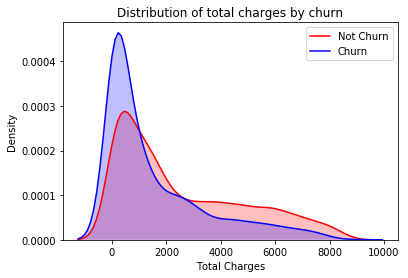

In [36]:
ax = sns.kdeplot(dataset.TotalCharges[(dataset["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(dataset.TotalCharges[(dataset["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

## (3.) Data Modeling and  (4.) Data Evaluation

### Each model is evaluated using Accuracy, Confusion matrix and AUC curve
#### 3.1. Logistic Regression
#### 3.2. Random forests
#### 3.3. XGBOOST

### 3.1. Building and Evaluating Logistic Regression model

In [37]:
# We will use the data frame where we had created dummy variables
y = dt_dummies['Churn'].values
X = dt_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

Evaluation: LOGISTIC REGRESSION
            ACCURACY:  0.8075829383886256
            CONFUSION MATRIX:
[[1418  162]
 [ 244  286]]
            AUC: 0.83
            ROC curve


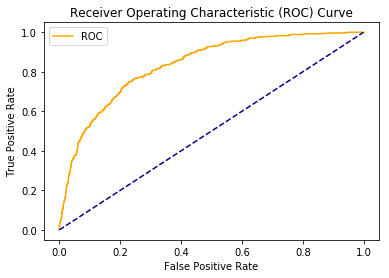

In [38]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

from sklearn import metrics
preds_lr = model.predict(X_test)

print("Evaluation: LOGISTIC REGRESSION")
# Print the prediction accuracy
print ("            ACCURACY: ",metrics.accuracy_score(y_test, preds_lr))

# Create the Confusion matrix
print("            CONFUSION MATRIX:")
print(confusion_matrix(y_test,preds_lr))



#Defining function for Performance metric : AOC (AREA UNDER CURVE)
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


probs = model.predict_proba(X_test)

#keeping only the probabilty of positive class
probs = probs[:, 1]

#Computing AUC curve
auc = roc_auc_score(y_test, probs)
print('            AUC: %.2f' % auc)

#Getting AUC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
print("            ROC curve")
plot_roc_curve(fpr, tpr)



AxesSubplot(0.125,0.125;0.775x0.755)


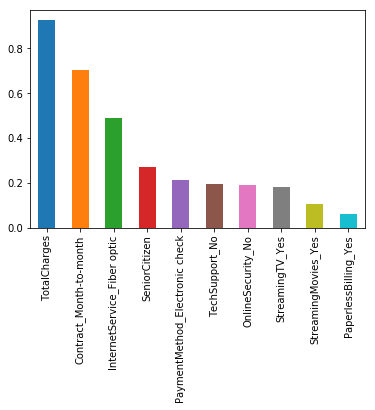

In [39]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


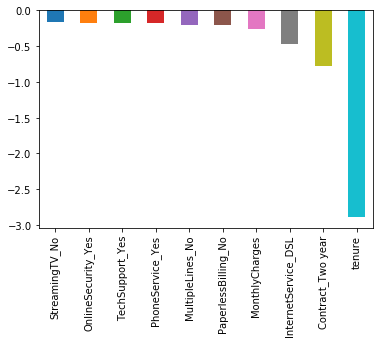

In [40]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

### 3.2. Building and Evaluating Random Forests model

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Evaluation: RANDOM FORESTS
            ACCURACY:  0.8088130774697939
            CONFUSION MATRIX:
[[964  88]
 [181 174]]
            AUC: 0.84
            ROC curve


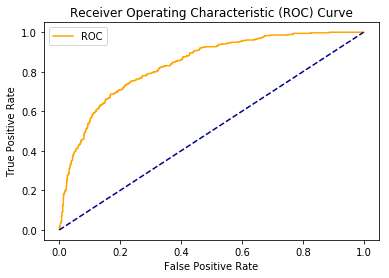

In [41]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
preds_rf = model_rf.predict(X_test)

print("Evaluation: RANDOM FORESTS")
# Print the prediction accuracy
print ("            ACCURACY: ",metrics.accuracy_score(y_test, preds_rf))

# Create the Confusion matrix
print("            CONFUSION MATRIX:")
print(confusion_matrix(y_test,preds_rf))


#Defining function for Performance metric : AOC (AREA UNDER CURVE)
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


probs_rf = model_rf.predict_proba(X_test)

#keeping only the probabilty of positive class
probs_rf = probs_rf[:, 1]

#Computing AUC curve
auc = roc_auc_score(y_test, probs_rf)
print('            AUC: %.2f' % auc)

#Getting AUC curve
fpr, tpr, thresholds = roc_curve(y_test, probs_rf)
print("            ROC curve")
plot_roc_curve(fpr, tpr)



## Feature importance in relation to target variable

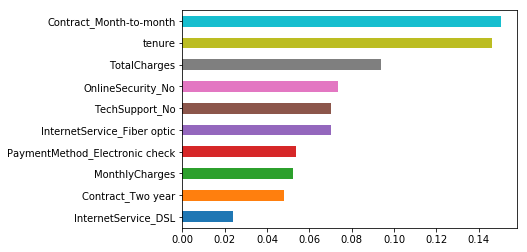

In [42]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

### 3.3. Building and Evaluating XGBoost model 

Evaluation: XGBOOST
            ACCURACY:  0.8251184834123223
            CONFUSION MATRIX:
[[1449  129]
 [ 240  292]]
            AUC: 0.86
            ROC curve


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


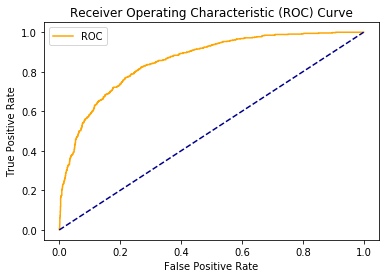

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

preds_xg = model_xgb.predict(X_test)

#Defining function for Performance metric : AOC (AREA UNDER CURVE)
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


probs_xg = model_xgb.predict_proba(X_test)

#keeping only the probabilty of positive class
probs_xg = probs_xg[:, 1]


print("Evaluation: XGBOOST")
# Print the prediction accuracy
print ("            ACCURACY: ",metrics.accuracy_score(y_test, preds_xg))

# Create the Confusion matrix
print("            CONFUSION MATRIX:")
print(confusion_matrix(y_test,preds_xg))

#Computing AUC curve
auc = roc_auc_score(y_test, probs_xg)
print('            AUC: %.2f' % auc)

#Getting AUC curve
fpr, tpr, thresholds = roc_curve(y_test, probs_xg)
print("            ROC curve")
plot_roc_curve(fpr, tpr)



## 5. Observations: Retention Policies
(i) Two_year contract reduces chances of churn.


(ii) Two_year contract along with tenure has the most negative relation with churn. 


(iii) DSL Internet service is negatively correlated.


(iv) Total_charges, monthly contracts, fibre optics can lead to higher churn.


(v) Monthly contracts,TotalCharges and tenure are the most important predictor variables to predict churn.
